# Exploratory Data Analysing Using Youtube Video Data for Travel Channel 
## [Channel name: MOUNTAIN TREKKER] 
##### Data from this channel is being used for research purpose only.

##    

##### In this project, my objectives are as follows:

##### -Familiarizing myself with the YouTube API and the process of retrieving video data.
##### -Investigating video data to gain insights into the factors influencing video performance on YouTube
##### -Incorporating Natural Language Processing (NLP) techniques to identify the subjects being covered in videos and analyzing which tags are particularly effective in driving engagement and viewership.[2]

#### Dataset:
##### The dataset for this project comes from the YouTube channel of a well-known travel enthusiast, Varun, who goes by the name "MOUNTAIN TREKKER." Varun is living the dream as a full-time traveler, driven by his love for solo adventures and connecting with people from all around the world. After exploring the incredible landscapes of India for several years, he expanded his horizons to discover the beauty of the entire globe.
##### On his YouTube channel, Varun shares travel series in Hindi, packed with valuable tips and tricks, especially geared towards those who love budget-friendly travel. His content is all about inspiring and helping others make the most of their journeys.[3]

In [1]:
channel_ids=['']#removed for privacy
api_key=''#removed for privacy

In [2]:
#Import libaries
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
from dateutil import parser
import isodate
from IPython.display import JSON
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Data using Youtube API

In [3]:
api_service_name = "youtube"
api_version = "v3"
#getting credentials
youtube = build(
    api_service_name, api_version, developerKey=api_key)

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id= ','.join(channel_ids)
)
response = request.execute()

JSON(response)

<IPython.core.display.JSON object>

In [4]:
#Getting channel statistics
def get_channel_stats(youtube, channel_ids):
    data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for item in response['items']:
        d = {'channelName': item['snippet']['title'],
                    'subscribers':item['statistics']['subscriberCount'],
                    'views':item['statistics']['viewCount'],
                    'totalVideos':item['statistics']['videoCount'],
                    'playlistId':item['contentDetails']['relatedPlaylists']['uploads']}
        data.append(d)
    
    return pd.DataFrame(data)

In [5]:
channel_stats= get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,MOUNTAIN TREKKER,1580000,233025914,641,UUl5dXugC3XZeDVsDkTaWJ4g


In [6]:
#getting video IDs
playlist_id="UUl5dXugC3XZeDVsDkTaWJ4g"

def get_video_ids(youtube, playlist_id):  

    video_ids = []
    request = youtube.playlistItems().list(
                part='snippet,contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
        
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
    return video_ids

In [8]:
video_ids= get_video_ids(youtube, playlist_id)


In [9]:
#getting information on the videos
def get_video_details(youtube, video_ids):       
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
            
    return pd.DataFrame(all_video_info)

In [10]:
video_df=get_video_details(youtube, video_ids)
#data to CSV file for future references
video_df.to_csv('video_data.csv')

In [12]:
df= video_df
df.head(10)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,GIejyt4CJgc,MOUNTAIN TREKKER,Another trip has begun...,,None,2023-10-18T20:01:20Z,19436,1220,None,46,PT1M,hd,false
1,9rk00N43kjo,MOUNTAIN TREKKER,TURKEY’s STRANGE VILLAGE - ‘Otluk’,"For more than a week, I stayed in Otluk, a vil...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-10-08T03:30:24Z,59165,2807,None,241,PT12M23S,hd,false
2,RGadToXhvF0,MOUNTAIN TREKKER,Indian YouTuber in Turkey Village - Part 1,"For more than a week, I stayed in Otluk, a vil...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-10-01T03:28:52Z,138001,5051,None,403,PT22M41S,hd,false
3,7nccHj4UPWM,MOUNTAIN TREKKER,"UNSEEN TURKEY | Sandikli, Kaklik Caves (Underg...","So, everyone knows Istanbul, Cappadocia, Antal...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-09-24T03:28:52Z,60992,2694,None,182,PT25M31S,hd,true
4,vO0NluJV_lE,MOUNTAIN TREKKER,8 Hours in This TURKISH TRAIN (Pamukkale Exp.),I travelled from Istanbul to Pamukkale. After ...,"[TouristHelpline, MountainTrekker, VarunVagish...",2023-09-17T03:28:53Z,124128,4024,None,243,PT20M59S,hd,false
5,oGIx3tZiFYQ,MOUNTAIN TREKKER,"BUS TRAVEL in TURKEY, Still NOT EASY for Forei...",I travelled from Istanbul to Pamukkale and had...,"[TouristHelpline, MountainTrekker, VarunVagish...",2023-09-10T03:29:00Z,67836,2619,None,130,PT23M34S,hd,false
6,ZmAOsdIIu9U,MOUNTAIN TREKKER,"ISTANBUL TRIP COST, but service quality?",Are you ready to discover the secrets of budge...,"[TouristHelpline, MountainTrekker, VarunVagish...",2023-09-03T03:29:44Z,109082,3544,None,176,PT15M36S,hd,false
7,80gdBnOLEzA,MOUNTAIN TREKKER,"Pakistanis in Turkey, Reaction with Indian","In 2018, and once again recently, I encountere...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-08-27T03:29:06Z,74729,3448,None,198,PT16M32S,hd,true
8,9zZ6ncjR4yA,MOUNTAIN TREKKER,"Reality Behind Free Turkish Tea : Day 1, Istanbul","While trying to explore the raw Istanbul, the ...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-08-20T03:29:03Z,137294,5856,None,402,PT23M8S,hd,false
9,Jw8k05ea970,MOUNTAIN TREKKER,"UNKNOWN, UNSEEN... TURKEY",Türkiye or Turkey has much more to offer than ...,"[TouristHelpline, MountainTrekker, VarunVagish...",2023-08-13T03:27:14Z,160135,5693,None,496,PT12M23S,hd,false


## Data Preprocessing

In [13]:
df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [14]:
df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [16]:
#converting data type of required columns from object to int
numeric_cols=['viewCount','likeCount','favouriteCount','commentCount']
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric, errors='coerce',axis=1)

In [17]:
#Converting the published stamp to publish day in the week
df['publishedAt'] =  df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishDayName'] = df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [18]:
#convert duration to seconds
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

In [19]:
#tags count
df['tagCount']= df['tags'].apply(lambda x: 0 if x is None else len(x))

In [20]:
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,GIejyt4CJgc,MOUNTAIN TREKKER,Another trip has begun...,,None,2023-10-18 20:01:20+00:00,19436.0,1220.0,NaN,46.0,PT1M,hd,false,Wednesday,60.0,0
1,9rk00N43kjo,MOUNTAIN TREKKER,TURKEY’s STRANGE VILLAGE - ‘Otluk’,"For more than a week, I stayed in Otluk, a vil...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-10-08 03:30:24+00:00,59165.0,2807.0,NaN,241.0,PT12M23S,hd,false,Sunday,743.0,11
2,RGadToXhvF0,MOUNTAIN TREKKER,Indian YouTuber in Turkey Village - Part 1,"For more than a week, I stayed in Otluk, a vil...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-10-01 03:28:52+00:00,138001.0,5051.0,NaN,403.0,PT22M41S,hd,false,Sunday,1361.0,11
3,7nccHj4UPWM,MOUNTAIN TREKKER,"UNSEEN TURKEY | Sandikli, Kaklik Caves (Underg...","So, everyone knows Istanbul, Cappadocia, Antal...","[TouristHelpline, MountainTrekker, VarunVagish...",2023-09-24 03:28:52+00:00,60992.0,2694.0,NaN,182.0,PT25M31S,hd,true,Sunday,1531.0,11
4,vO0NluJV_lE,MOUNTAIN TREKKER,8 Hours in This TURKISH TRAIN (Pamukkale Exp.),I travelled from Istanbul to Pamukkale. After ...,"[TouristHelpline, MountainTrekker, VarunVagish...",2023-09-17 03:28:53+00:00,124128.0,4024.0,NaN,243.0,PT20M59S,hd,false,Sunday,1259.0,11


##### Now the data is clean and ready to be explored.

## Exploratory Data Analysis

##### Let's start by looking into the distribution of a few columns like Views,likes and comments.

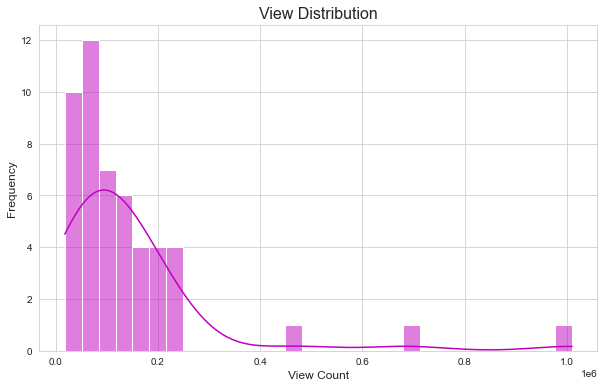

In [22]:
#View distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='viewCount', bins=30, color='m',  kde=True)

plt.title('View Distribution', fontsize=16)
plt.xlabel('View Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### he typical video on the channel receives an average of 50,000 to 100,000 views, with the highest-viewed video reaching an impressive milestone of 1,000,000 views.

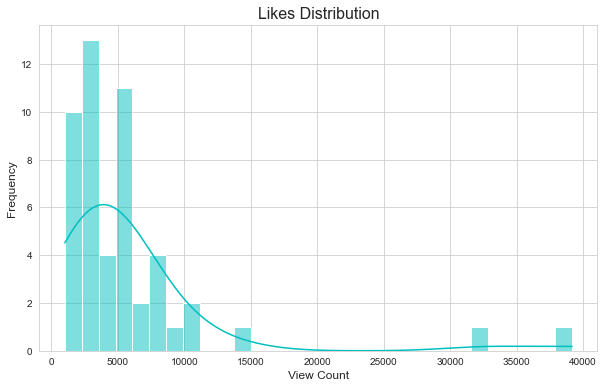

In [23]:
#Likes distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='likeCount', bins=30, color='c',  kde=True)
plt.title('Likes Distribution', fontsize=16)
plt.xlabel('View Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### The videos typically garner an average of around 5,000 likes, while the most-liked video falls within the range of 38,000 to 39,000 likes.

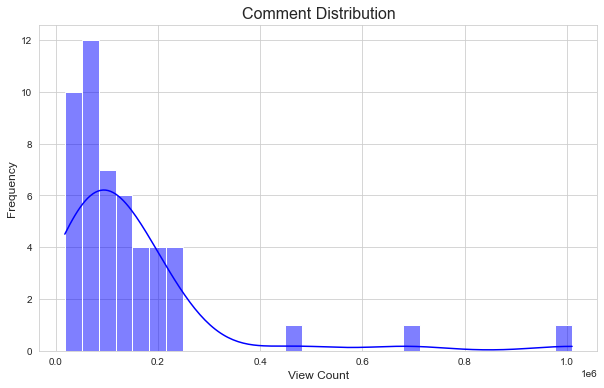

In [24]:
#Comments distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='viewCount', bins=30, color='b',  kde=True)
plt.title('Comment Distribution', fontsize=16)
plt.xlabel('View Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### The videos generally receive an average of 100,000 comments, with the highest number of comments on a single video reaching an impressive 1,000,000.

### Are views influenced by likes and comments? 

<AxesSubplot: xlabel='likeCount', ylabel='viewCount'>

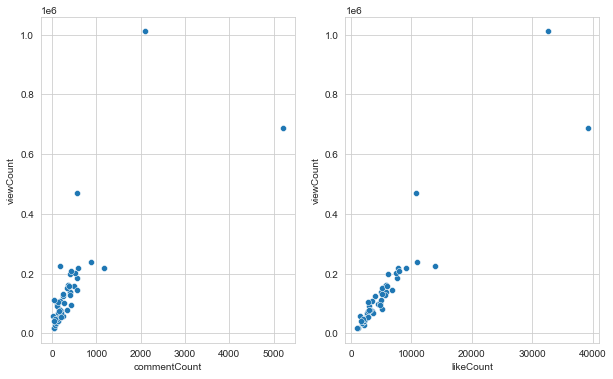

In [26]:
#checking for correlation between likes and comments
fig, ax= plt.subplots(1,2,figsize=(10, 6))
sns.scatterplot(data=df, x='commentCount',y='viewCount',ax=ax[0])
sns.scatterplot(data=df, x='likeCount',y='viewCount',ax=ax[1])

##### This shows stronge connection between the number of likes and how well a video does, as opposed to the number of comments. The more people watch a video, they're more likely to hit the like button, and this, in turn, leads to more comments. 
##### Looking at them together

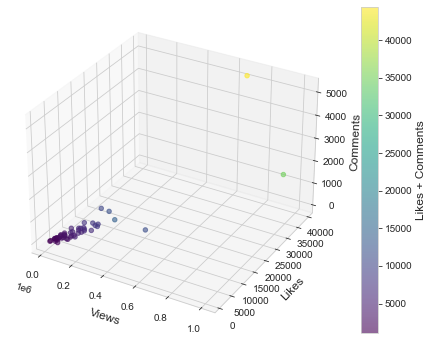

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection ='3d')
c=df['likeCount']+df['commentCount']
scatter=ax.scatter(df['viewCount'], df['likeCount'], df['commentCount'],c=c,cmap='viridis', s=20, alpha=0.6)
ax.set_xlabel('Views', fontsize=12)
ax.set_ylabel('Likes', fontsize=12)
ax.set_zlabel('Comments', fontsize=12)
cbar = fig.colorbar(scatter)
cbar.set_label('Likes + Comments', fontsize=12)
plt.show()

### Best Performing Videos

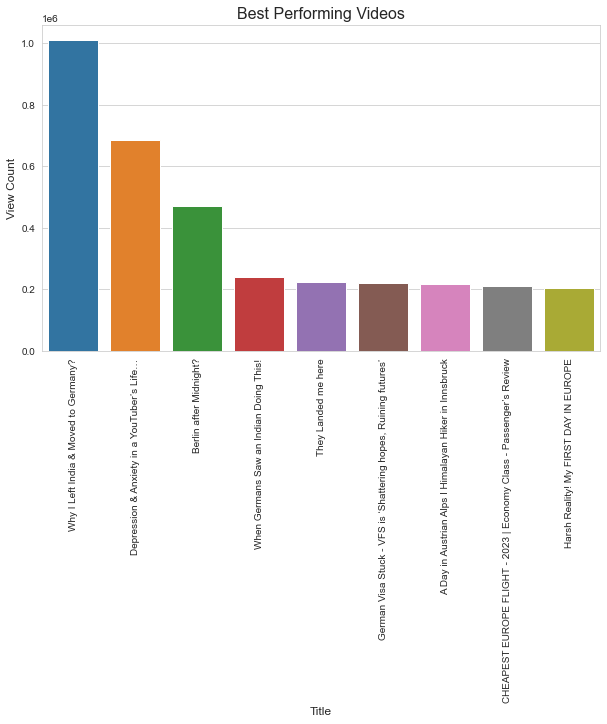

In [28]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(x="title", y='viewCount',data=df.sort_values('viewCount',ascending=False)[0:9])
plot= ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Best Performing Videos', fontsize=16)
plt.xlabel('Title', fontsize=12)
plt.ylabel('View Count', fontsize=12)
plt.show()

### Worst Performing videos

/Users/kushimahar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kushimahar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


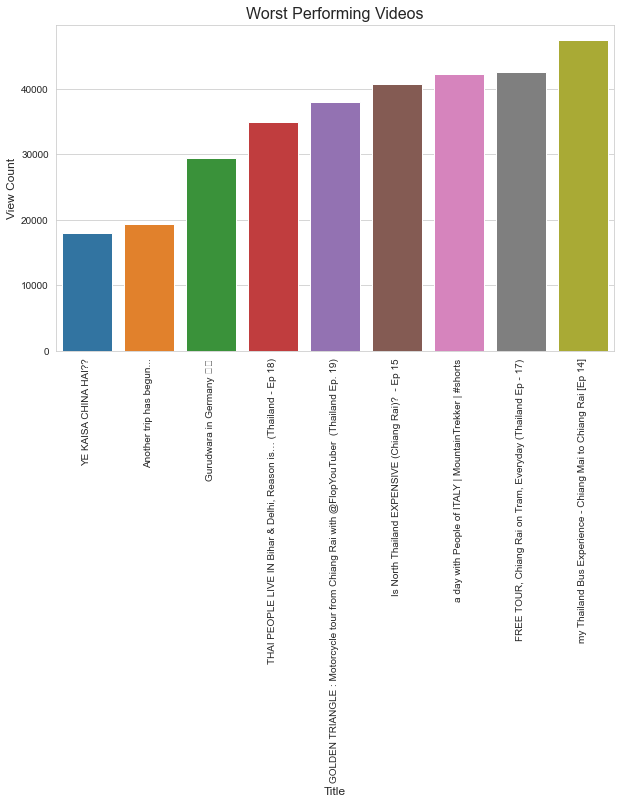

In [29]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(x="title", y='viewCount',data=df.sort_values('viewCount',ascending=True)[0:9])
plot= ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Worst Performing Videos', fontsize=16)
plt.xlabel('Title', fontsize=12)
plt.ylabel('View Count', fontsize=12)
plt.show()

### Distribution of views

/Users/kushimahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


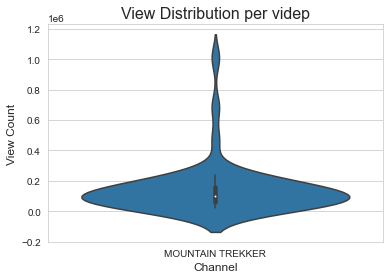

In [31]:
sns.violinplot(df['channelTitle'], df['viewCount'])
plt.title('View Distribution per videp', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('View Count', fontsize=12)
plt.show()

##### Large proportion of the views are in the lower half but the views are consistent across videos

### How video duration influence the video statistics?

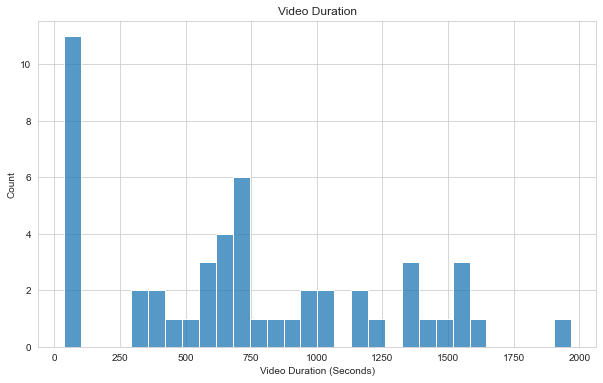

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='durationSecs',bins=30)
plt.xlabel('Video Duration (Seconds)')
plt.title('Video Duration')

plt.show()

##### Most videos are 600-750 seconds with a similar count having 1300 and 1550 seconds approx. The largest amount of videos are short, around 1 min, understandbly due to the rising popularity of Youtube shorts.

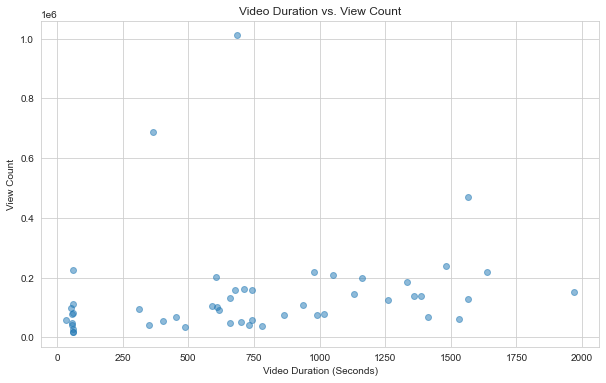

In [35]:
#Video Duration vs. View Count
plt.figure(figsize=(10, 6))
plt.scatter(df['durationSecs'], df['viewCount'], alpha=0.5)
plt.xlabel('Video Duration (Seconds)')
plt.ylabel('View Count')
plt.title('Video Duration vs. View Count')
plt.grid(True)
plt.show()

##### This makes the distribution clearer and shows the video with duration of about 700seconds (11.6 min approx) having over 10,00,000 views.

Text(0.5, 1.0, 'Video Duration vs. Comment/Likes Count')

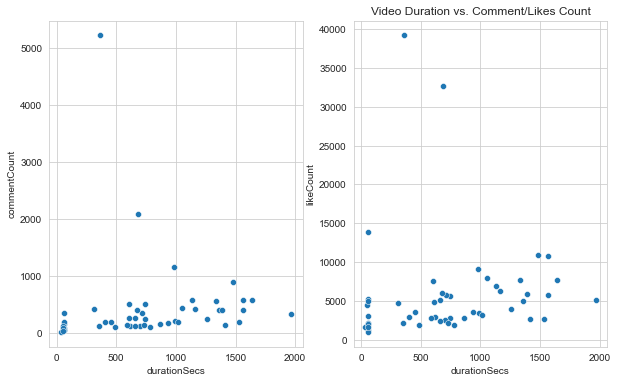

In [37]:
fig, ax =plt.subplots(1,2,figsize=(10, 6))
sns.scatterplot(data = df, x = "durationSecs", y = "commentCount", ax=ax[0])

sns.scatterplot(data = df, x = "durationSecs", y = "likeCount", ax=ax[1])
plt.title('Video Duration vs. Comment/Likes Count')

##### The plots of duration against comment count and like count show that shorter videos tend have the most likes and comments.

### Let us see how tags impact the statistics.

#### Number of tags vs views

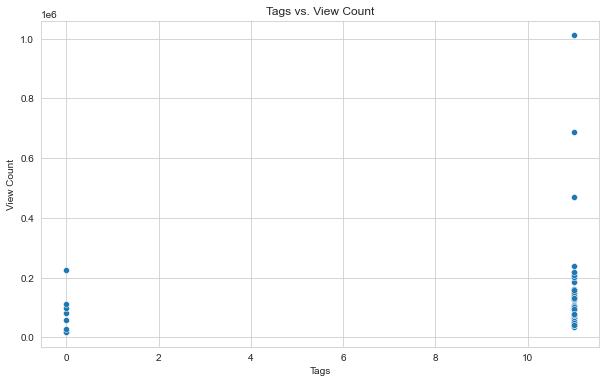

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = "tagCount", y = "viewCount")
plt.xlabel('Tags')
plt.ylabel('View Count')
plt.title('Tags vs. View Count')
plt.grid(True)
plt.show()

##### There is a clear distinction with less views to less number of tags and an rise in the numbers with tags above 10.

#### Wordcloud of tags will show us the more focused tags.

In [39]:
stop_words = set(stopwords.words('english'))
df['tags_no_stopwords'] = df['tags'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['tags_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 


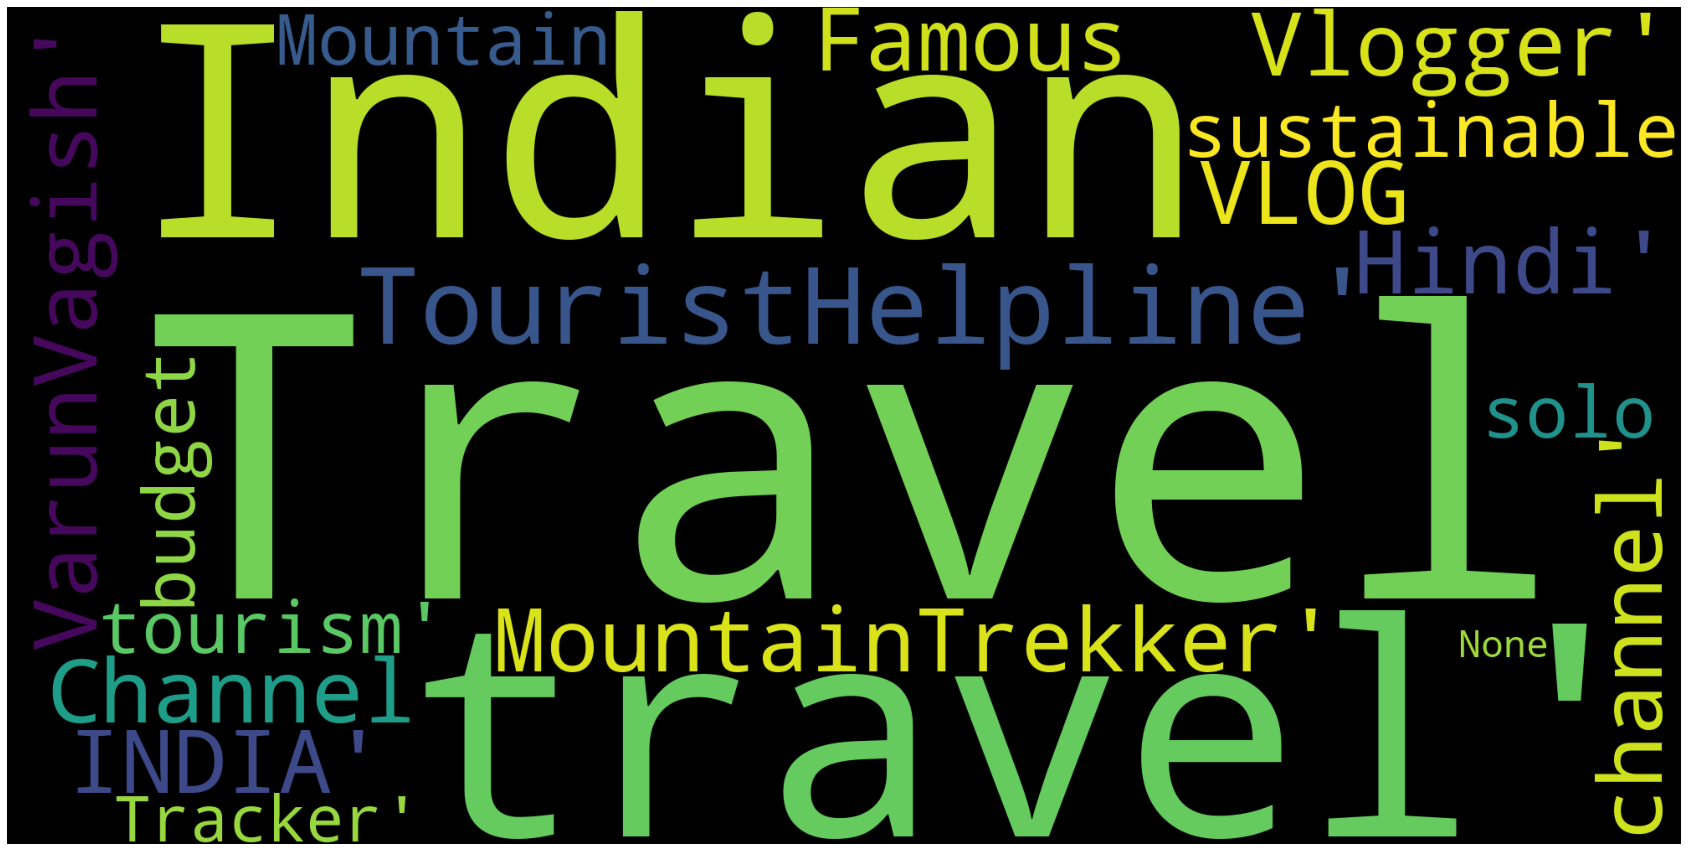

In [40]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)


### Visualising how number of tags has a significant effect on the performance of videos 

In [41]:
df_high_tags = df[df['tagCount'] > 10]
df_low_tags = df[df['tagCount'] <= 10]
high_tags_stats = df_high_tags[['viewCount', 'likeCount', 'commentCount']].describe()
low_tags_stats = df_low_tags[['viewCount', 'likeCount', 'commentCount']].describe()


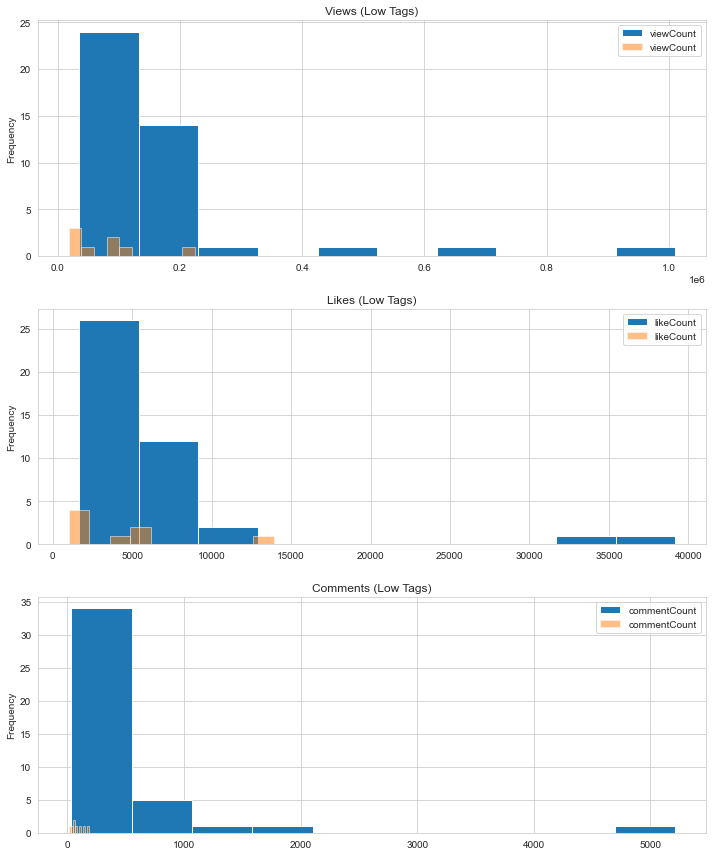

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
#views
df_high_tags[['viewCount']].plot(kind='hist', ax=axes[0], title='Views (High Tags)')
df_low_tags[['viewCount']].plot(kind='hist', ax=axes[0], alpha=0.5, title='Views (Low Tags)')
#likes
df_high_tags[['likeCount']].plot(kind='hist', ax=axes[1], title='Likes (High Tags)')
df_low_tags[['likeCount']].plot(kind='hist', ax=axes[1], alpha=0.5, title='Likes (Low Tags)')
#comments
df_high_tags[['commentCount']].plot(kind='hist', ax=axes[2], title='Comments (High Tags)')
df_low_tags[['commentCount']].plot(kind='hist', ax=axes[2], alpha=0.5, title='Comments (Low Tags)')
plt.tight_layout()
plt.show()


##### These make it clear that the number of tags is directly proportional to video performance

### Analyze how the video peerformance have evolved over time

In [43]:
#grouping the 'publishedAt' column, and aggregate metrics
time_grouped = df.groupby(df['publishedAt'].dt.to_period('M')).agg({
    'viewCount': 'sum',
    'likeCount': 'sum',
    'commentCount': 'sum'
})

<ipython-input-43-1a39f721d8b1>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  time_grouped = df.groupby(df['publishedAt'].dt.to_period('M')).agg({


In [44]:
time_grouped.index = time_grouped.index.to_timestamp()

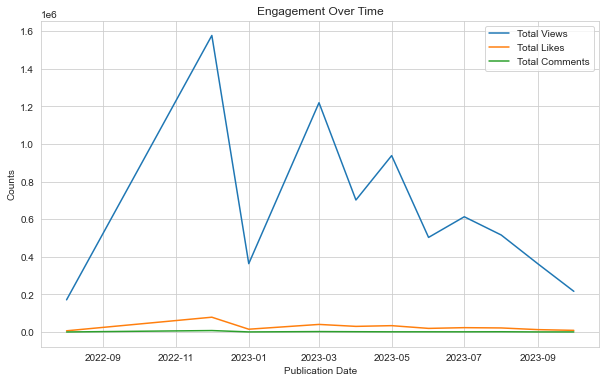

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(time_grouped.index, time_grouped['viewCount'], label='Total Views')
plt.plot(time_grouped.index, time_grouped['likeCount'], label='Total Likes')
plt.plot(time_grouped.index, time_grouped['commentCount'], label='Total Comments')
plt.xlabel('Publication Date')
plt.ylabel('Counts')
plt.title('Engagement Over Time')
plt.legend()
plt.grid(True)
plt.show()

##### The number of likes and comments are relatively consistent wherase the views fluctuate but do not influence the others much.

### Upload schedule

<Figure size 720x432 with 0 Axes>

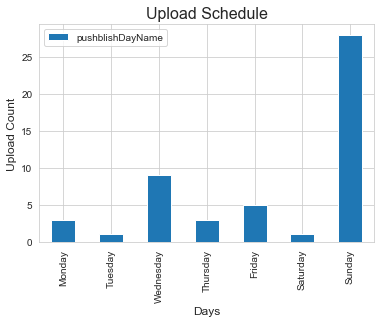

In [47]:
plt.figure(figsize=(10, 6))
day_df = pd.DataFrame(df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=90)
plt.title('Upload Schedule', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Upload Count', fontsize=12)
plt.show()

##### More videos are uploaded on Sundays, with Wednesday,second  in a comparitively fewer count.

### Analyzing publishing frequency

In [49]:
#datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

<ipython-input-50-4f008d593401>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  publishing_frequency = df.groupby(df['publishedAt'].dt.to_period('M')).size()


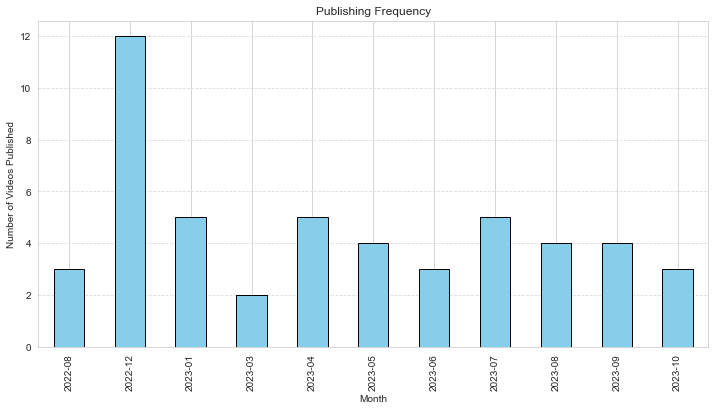

In [50]:
#Groupping by month
publishing_frequency = df.groupby(df['publishedAt'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
publishing_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Videos Published')
plt.title('Publishing Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### WordCloud of frequently mentioned keywords

In [51]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 


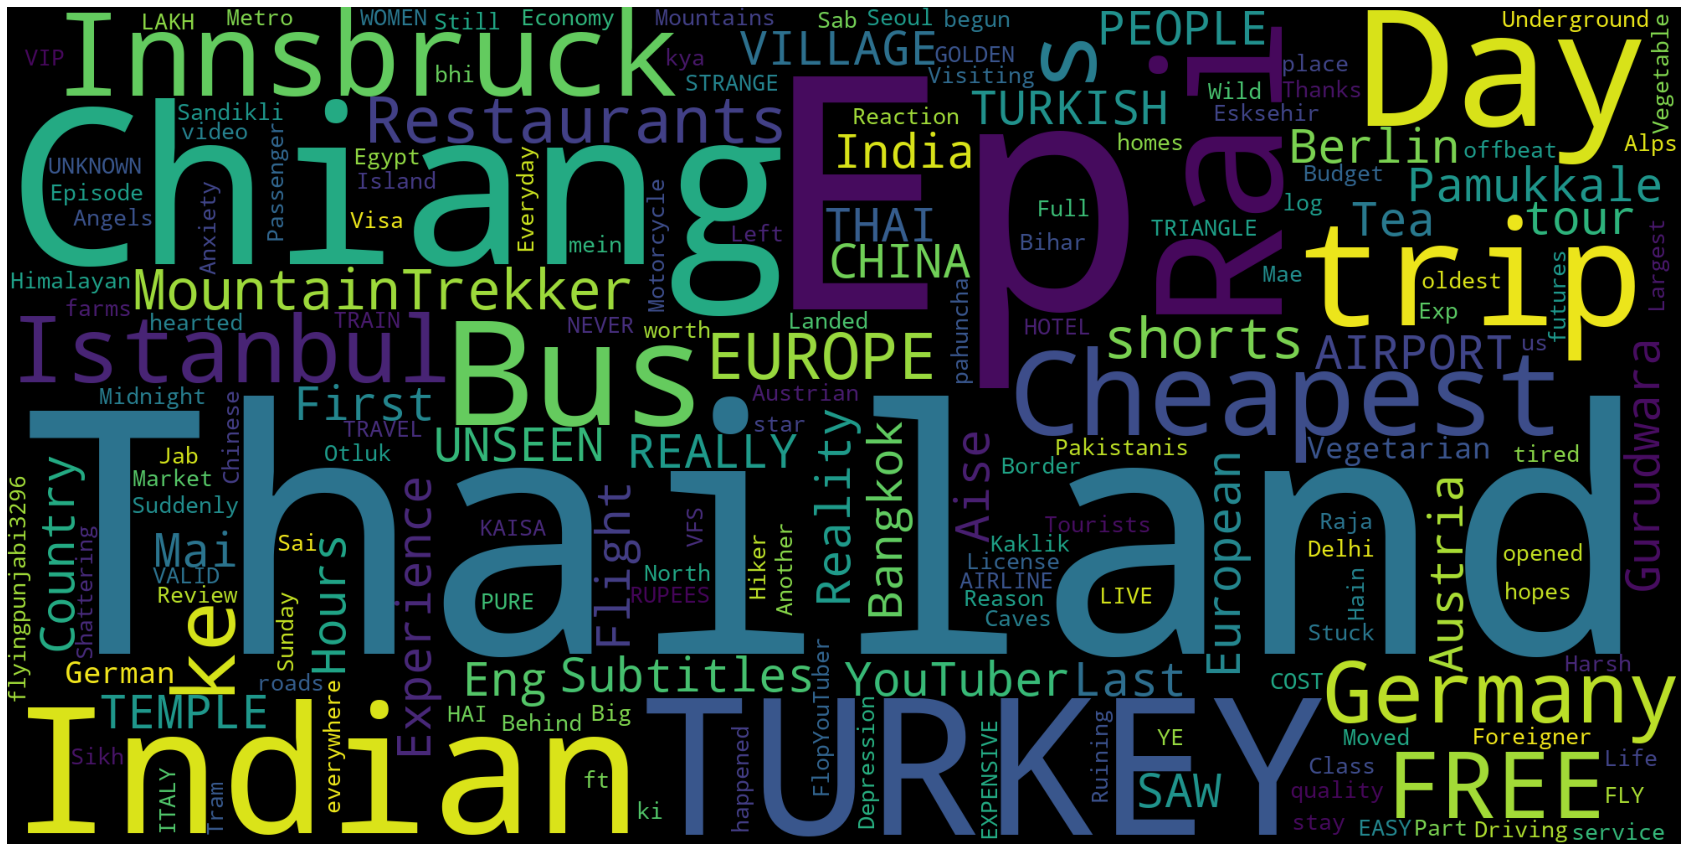

In [52]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

##### Most of the highlights are of diffrent countries like Thailand, Turkey and other travel commutes and activities.

### Conclusion
##### With the help of video data from the channel we learn a lot about travel youtube. #####Videos are more likely to get more views when there are more likes and comments. Which could be an inclination towards the algorithm youtube works with. This is positively influenced by the tags and its frequency.
##### Videos of shorter duration are doing well.

##### Limitation: The number of videos obtained from the playlistid are to the maximum of 50 as per youtube api

### Future Research:
##### Identify the best days of the week and times of the day to publish videos for optimal performance. This can help in scheduling video releases more strategically.
##### Analyze where the majority of the channel's viewers come from geographically.
##### Explore whether there are seasonal trends in video performance.

### References:
##### [1] Youtube API. Avaiable at https://developers.google.com/youtube/v3
##### [2] Youtube API for Python https://youtu.be/D56_Cx36oGY?si=uOYnVscgC7zIoNqO
##### [3]Channel: Mountain trekker https://www.youtube.com/@mountaintrekker/featured
##### [4] Converting video durations to time function. https://stackoverflow.com/questions/15596753/how-do-i-get-video-durations-with-youtube-api-version-3